EDA CON LOS DATASETS LIMPIOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

import warnings
warnings.filterwarnings("ignore")

Adelanto el análisis exploratorio de datos  para elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado.

In [ ]:
DATASET REVIEWS

In [3]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,reviews_item_id,helpful,recommend,user_id,user_url,reviews_date,sentiment_analysis,release_anio
0,1250,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1,2009
1,1250,No ratings yet,True,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,2015-01-15,1,2009
2,1250,No ratings yet,True,76561198107847795,http://steamcommunity.com/profiles/76561198107...,2014-12-12,1,2009
3,1250,0 of 1 people (0%) found this review helpful,True,usaidwotnow,http://steamcommunity.com/id/usaidwotnow,2013-12-13,0,2009
4,1250,2 of 3 people (67%) found this review helpful,True,76561198081529182,http://steamcommunity.com/profiles/76561198081...,2014-08-19,1,2009


In [4]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
utils.verificar_tipo_datos(df_reviews)

La cantidad de registros que hay son: 21432


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,reviews_item_id,[<class 'int'>],100.0,0.0,0
1,helpful,[<class 'str'>],100.0,0.0,0
2,recommend,[<class 'bool'>],100.0,0.0,0
3,user_id,[<class 'str'>],100.0,0.0,0
4,user_url,[<class 'str'>],100.0,0.0,0
5,reviews_date,[<class 'str'>],100.0,0.0,0
6,sentiment_analysis,[<class 'int'>],100.0,0.0,0
7,release_anio,[<class 'str'>],100.0,0.0,0


In [5]:
utils.resumen_cant_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
1,13164,61.42
2,6466,30.17
0,1802,8.41


In [6]:
utils.resumen_cant_porcentaje(df_reviews, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,19283,89.97
False,2149,10.03


De los registros de reviews casi el 62% de los reviews reflejan sentimientos neutrales, casi el 30% reflejan sentimientos positivos hacia el juego y menos del 9% fue negativo. Pero en el 88% de los reviews se recomiendan los juegos que consumen.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [8]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False           554    2.584920
                   True           1248    5.823068
1                  False          1410    6.578947
                   True          11754   54.843225
2                  False           185    0.863195
                   True           6281   29.306644

In [9]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 21432


COLUMNA REVIEWS DATE

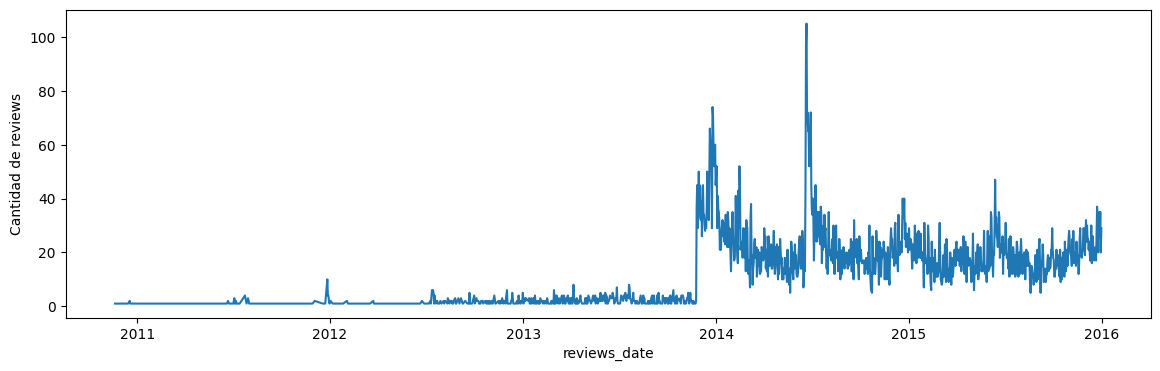

In [17]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Convierte a formato fecha
df["reviews_date"] = pd.to_datetime(df["reviews_date"])
# Calcula la cantidad de review por fecha
df_counts = df.groupby("reviews_date").count()

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="reviews_date", y="recommend")
plt.ylabel('Cantidad de reviews')
plt.show()

In [20]:
print('Días de cantidad pico de reviews')
df_counts.sort_values(by='recommend', ascending=False)['recommend'][:5]

Días de cantidad pico de reviews


reviews_date
2014-06-21    105
2014-06-20     97
2013-12-25     74
2014-06-29     72
2014-06-23     72
Name: recommend, dtype: int64

In [22]:
df_games = pd.read_csv('games.csv')
df_games.head()

,genres,price,early_access,id,release_anio,publisher,app_name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [23]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
utils.verificar_tipo_datos(df_games)

La cantidad de registros que hay son: 71552


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,price,[<class 'float'>],100.00,0.00,0
2,early_access,[<class 'bool'>],100.00,0.00,0
3,id,[<class 'int'>],100.00,0.00,0
4,release_anio,[<class 'str'>],100.00,0.00,0
5,publisher,"[<class 'str'>, <class 'float'>]",99.93,0.07,47
6,app_name,[<class 'str'>],100.00,0.00,0
7,title,[<class 'str'>],100.00,0.00,0
8,developer,[<class 'str'>],100.00,0.00,0


In [24]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28850


COLUMNA GENRES

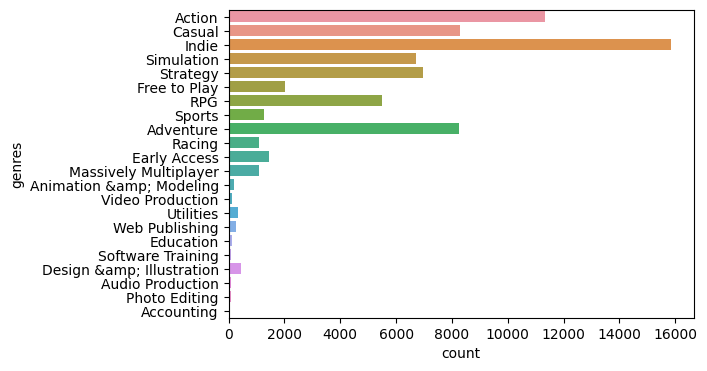

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

In [26]:
utils.resumen_cant_porcentaje(df_games, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11320,15.82
Casual,8282,11.57
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


COLUMNA RELEASE_ANIO

In [27]:
utils.resumen_cant_porcentaje(df_games, 'release_anio')[:10]

,Cantidad,Porcentaje
release_anio,,
2017,24968,34.89
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22
2012,2106,2.94
2011,986,1.38
Dato no disponible,850,1.19
2010,653,0.91


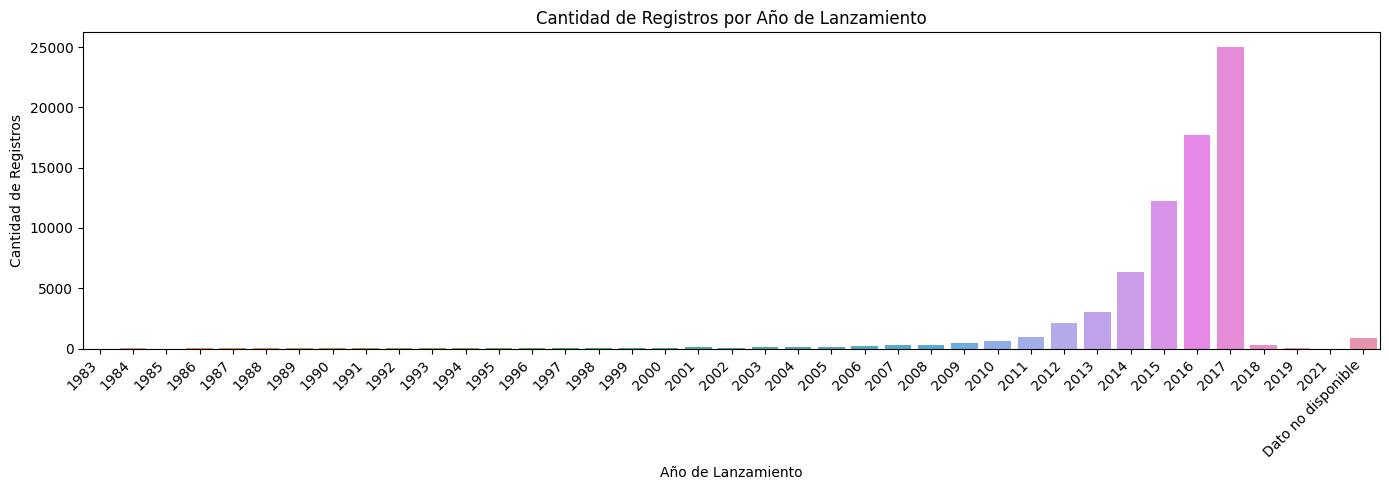

In [28]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['release_anio'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Filtra los registros con valores numéricos en la columna 'release_anio'
registros_numericos = df_games[df_games['release_anio'].str.isnumeric()]
# Convierte la columna 'release_anio' a valores enteros
registros_numericos['release_anio'] = registros_numericos['release_anio'].astype(int)
# Filtra los registros con años de lanzamiento antes de 2002
registros_antes_2002 = registros_numericos[registros_numericos['release_anio'] < 2002]

print(f"Cantidad de registros antes de 2002: {len(registros_antes_2002)}")
print(f"Cantidad de registros 'Dato no disponible': {df_games[df_games['release_anio'] == 'Dato no disponible'].shape[0]}")

Cantidad de registros antes de 2002: 679
Cantidad de registros 'Dato no disponible': 850


679 JUEGOS LANZADOS ANTES DEL ESTRENO DE LA PLATAFORMA, PUEDE TRATARSE DE UN ERROR

COLUMNAS PUBLISHER Y DEVELOPER

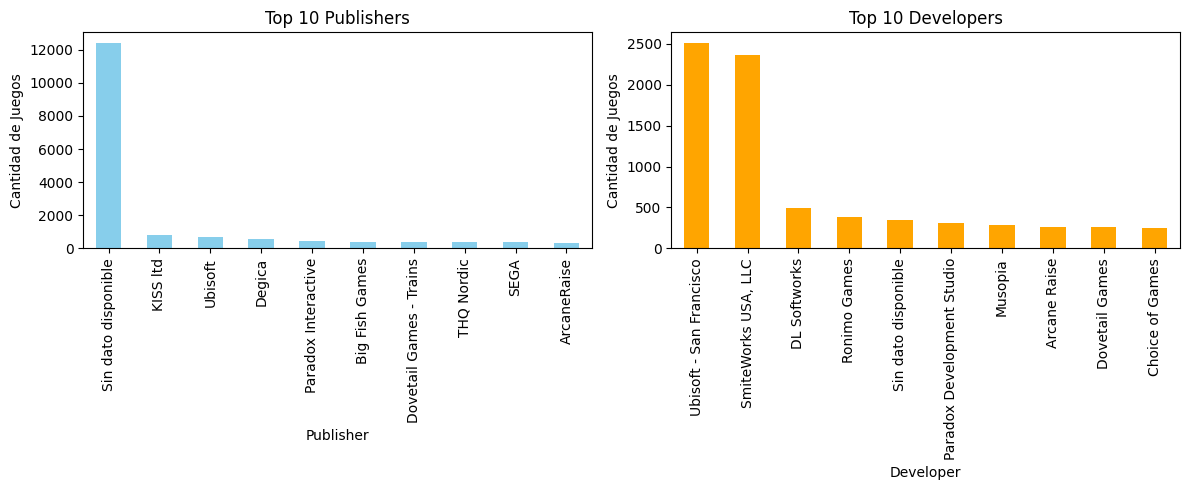

In [31]:
# Contar la cantidad de juegos por publisher
conteo_publisher = df_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [ ]:
COLUMNA PRICE

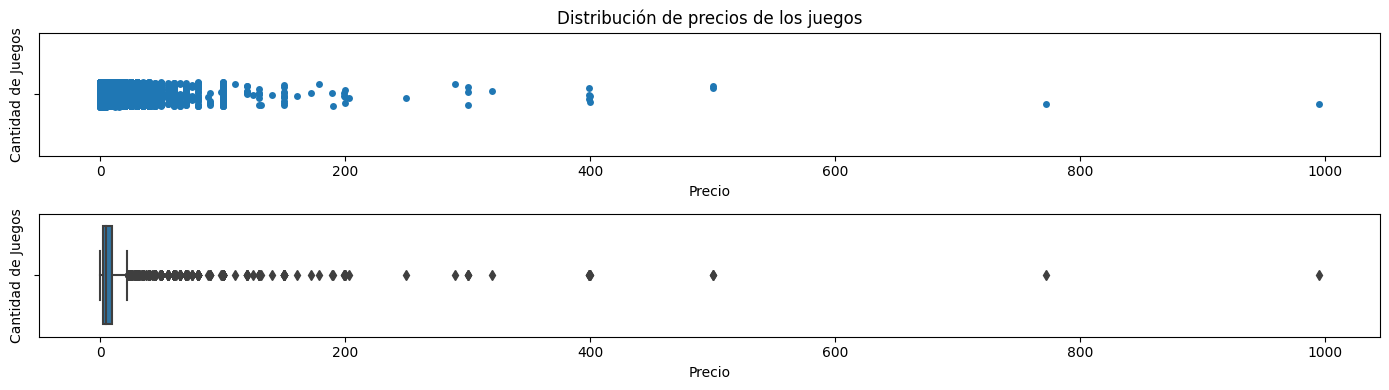

In [32]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df_games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax1)
ax1.set_xlabel('Precio') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax2)
ax2.set_xlabel('Precio') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [33]:
estadisticas = df_precio_unicos.astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {estadisticas[5]}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {estadisticas[6]}')
utils.bigote_max(pd.DataFrame(df_precio_unicos.astype(float))['price'])

El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.62
El 75% de los juegos tienen un precio menor de: 9.99
El bigote superior de la variable price se ubica en: 21.99
Hay 1746 valores atípicos en la variable price


DATASET ITEMS

In [35]:
df_items = pd.read_csv('items.csv')
df_items.head()

,item_id,item_name,playtime_forever,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


In [36]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
utils.verificar_tipo_datos(df_items)

La cantidad de registros que hay son: 5094105


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,user_id,[<class 'str'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,steam_id,[<class 'int'>],100.0,0.0,0
6,user_url,[<class 'str'>],100.0,0.0,0


COLUMNA PLAYTIME_FOREVER

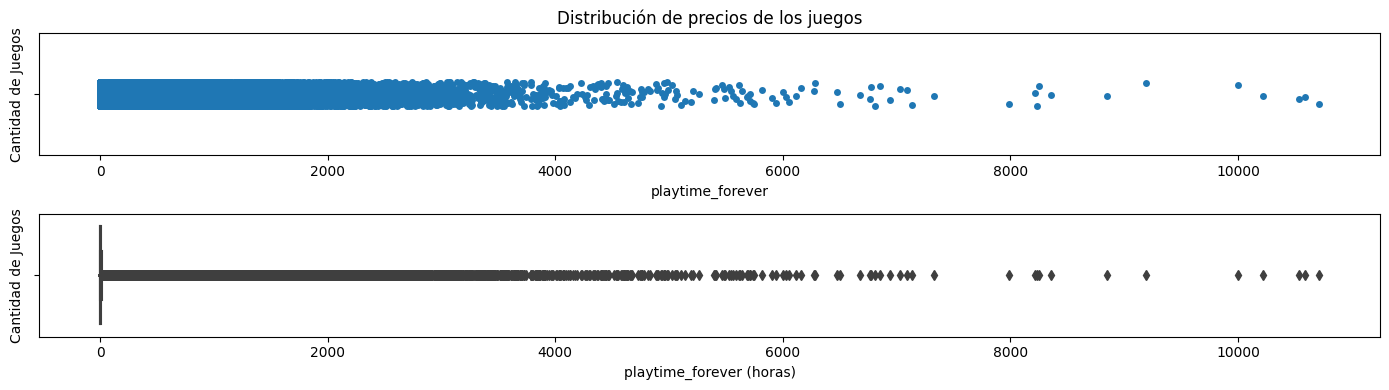

In [37]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [39]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El tiempo medio (mediana) de juego es de (horas): {round(estadisticas[5],2)}')
print(f'El tiempo medio (mediana) de juego es de (horas): {round(estadisticas[1],2)}')
print(f'El 75% de los juegos han sido jugados (horas): {round(estadisticas[6],2)}')
utils.bigote_max(df_items['playtime_hours'])

El tiempo medio (mediana) de juego es de (horas): 0.57
El tiempo medio (mediana) de juego es de (horas): 16.51
El 75% de los juegos han sido jugados (horas): 5.92
El bigote superior de la variable playtime_hours se ubica en: 14.79
Hay 763606 valores atípicos en la variable playtime_hours


COLUMNA ITEMS COUNT, REFERENTE A LOS JUEGOS CONSUMIDOS

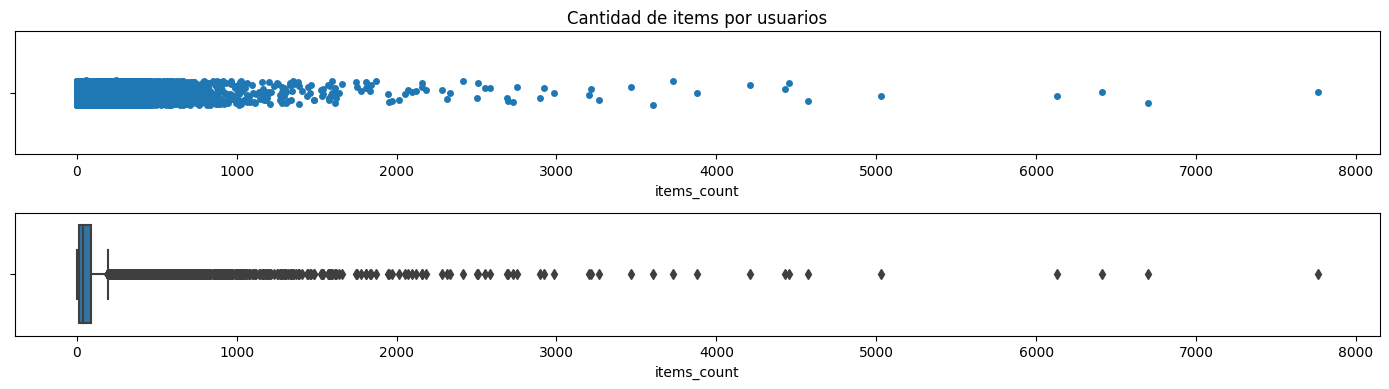

In [40]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [42]:
estadisticas = items_count_user['items_count'].astype(float).describe()
print(f'El ITEM medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El ITEM promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un ITEM menor de: {round(estadisticas[6],2)}')
utils.bigote_max(items_count_user.astype(float)['items_count'])

El ITEM medio (mediana) de los juegos es de: 40.0
El ITEM promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un ITEM menor de: 87.0
El bigote superior de la variable items_count se ubica en: 196.5
Hay 4957 valores atípicos en la variable items_count


<Figure size 1400x500 with 0 Axes>

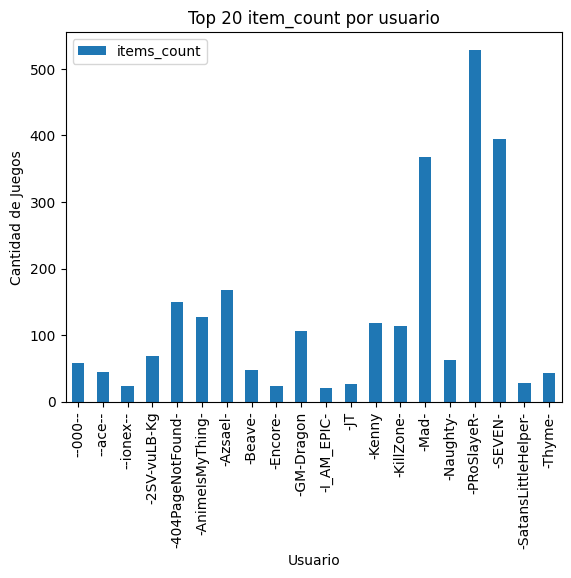

In [43]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

VARIABLES PARA MODELO DE RECOMENDACION

In [50]:
df_items = pd.read_csv('items.csv')
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head(2)

,reviews_item_id,helpful,recommend,user_id,user_url,reviews_date,sentiment_analysis,release_anio
0,1250,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1,2009
1,1250,No ratings yet,True,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,2015-01-15,1,2009


In [52]:
df_items.head(2)

,item_id,item_name,playtime_forever,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Creo un puntaje (ranking) para los juegos, a partir del análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. El análisis de sentimiento esta calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). Con esta información se busca hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

1 si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
2 si el análisis de sentimiento es neutral y no es recomendado (False)
3 si el análisis de sentimiento es neutral pero es recomendado (True)
4 si el análisis de sentimiento es positivo y no es recomendado (False)
5 si el análisis de sentimiento es positivo y es recomendado (True)

ASI LA FUNCION

In [55]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if row["sentiment_analysis"] == 0 and not row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["recommend"]:
        return 5
    else:
        return None

In [56]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)

,reviews_item_id,helpful,recommend,user_id,user_url,reviews_date,sentiment_analysis,release_anio,rating
0,1250,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1,2009,3
1,1250,No ratings yet,True,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,2015-01-15,1,2009,3


Creo un dataframe con las columnas 'user_id', 'reviews_item_id' y 'rating'

In [57]:
df1 = df_reviews[['user_id', 'reviews_item_id', 'rating']]
df1.head(2)

,user_id,reviews_item_id,rating
0,76561197970982479,1250,3
1,EndAtHallow,1250,3


Creo otro datafrma que contiene las columnas 'item_id' y los nombres de los juego.

In [58]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los dumplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10978 juegos


,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic


Agrego los nombres de los juegos al primer dataframe

In [59]:
df = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
df

,user_id,reviews_item_id,rating,item_id,item_name
0,76561197970982479,1250,3,1250.0,Killing Floor
1,EndAtHallow,1250,3,1250.0,Killing Floor
2,76561198107847795,1250,3,1250.0,Killing Floor
3,usaidwotnow,1250,1,1250.0,Killing Floor
4,76561198081529182,1250,3,1250.0,Killing Floor
...,...,...,...,...,...
21427,76561198226666576,284950,3,284950.0,Pixel Puzzles: Japan
21428,AusBacon,369290,2,369290.0,Airport Madness: World Edition
21429,ChrisCoroner,209120,3,209120.0,Street Fighter X Tekken
21430,MeloncraftLP,220090,1,220090.0,The Journey Down: Chapter One


In [60]:
utils.verificar_tipo_datos(df)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,reviews_item_id,[<class 'int'>],100.00,0.00,0
2,rating,[<class 'int'>],100.00,0.00,0
3,item_id,[<class 'float'>],88.85,11.15,2390
4,item_name,"[<class 'str'>, <class 'float'>]",88.85,11.15,2390


In [61]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['reviews_item_id'].unique())} juegos con reviews pero que no estan en `df_reviews`")
sin_juegos

Hay un total de 143 juegos con reviews pero que no estan en `df_reviews`


,user_id,reviews_item_id,rating,item_id,item_name
2792,76561198077246154,440,3,NaN,NaN
2793,devvonst,440,5,NaN,NaN
2794,boydeer,440,3,NaN,NaN
2795,jarrodtrim,440,5,NaN,NaN
2796,76561198067936203,440,3,NaN,NaN
...,...,...,...,...,...
21388,76561198086530323,289881,2,NaN,NaN
21399,76561198093267405,402290,3,NaN,NaN
21401,76561198093846750,318850,2,NaN,NaN
21403,76561198094162039,318791,2,NaN,NaN


In [62]:
# Se borran los nulos
df = df.dropna(subset=['item_id'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')
# Se verifican los tipo de dato y nulos
utils.verificar_tipo_datos(df)

Quedan 19042 registros


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,reviews_item_id,[<class 'int'>],100.0,0.0,0
2,rating,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'float'>],100.0,0.0,0
4,item_name,[<class 'str'>],100.0,0.0,0


In [63]:
df = df[['user_id', 'item_name', 'rating']]
df.head(3)

,user_id,item_name,rating
0,76561197970982479,Killing Floor,3
1,EndAtHallow,Killing Floor,3
2,76561198107847795,Killing Floor,3


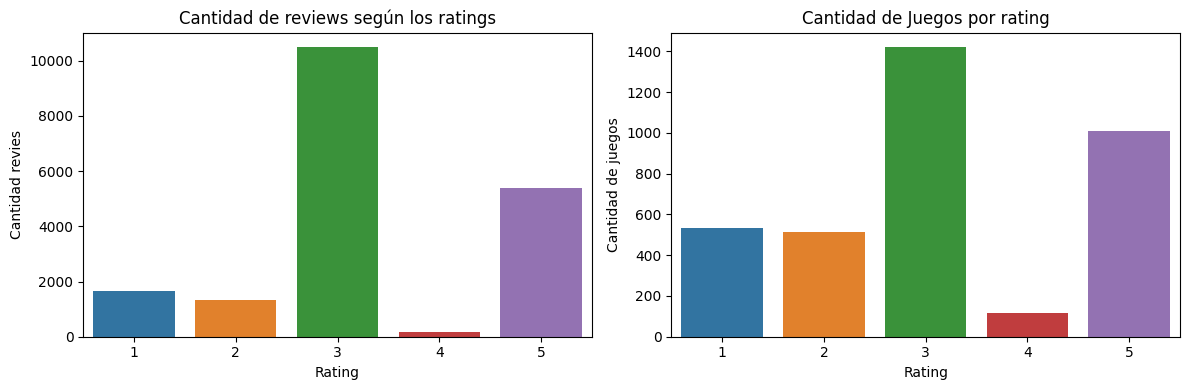

In [64]:
# Agrupa las calificaciones por rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0])
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Cantidad revies')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1])
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [65]:
# Cantidades de review por rating
utils.resumen_cant_porcentaje(df, 'rating')

,Cantidad,Porcentaje
rating,,
3,10483,55.05
5,5369,28.20
1,1668,8.76
2,1348,7.08
4,174,0.91


In [66]:
# Cantidades de juegos por rating
unique_games_per_rating

,rating,item_name
0,1,533
1,2,512
2,3,1420
3,4,117
4,5,1011


In [68]:
df.to_csv('df_recomendacion.csv', index=False, encoding='utf-8')
print(f"Se guardado como 'data/df_recomendacion.csv'")

Se guardado como 'data/df_recomendacion.csv'
